# __Group Project 4 - Team Luther Burbank__
<br>


# Unit Test for plot_two_gamma_table Function

This unit test is designed to ensure the correctness of the `plot_two_gamma_table` function, which is responsible for generating a bar chart comparing food expenditure changes between two population groups based on a given gamma table. The function is expected to create a bar chart with appropriate labels, titles, colors, and legend.

## Test Objective

The objective of this unit test is to verify that the `plot_two_gamma_table` function behaves as expected under different scenarios. Specifically, the test will ensure that:

- The function generates a bar chart without raising any errors.
- The bar chart includes correct labels for foods, population groups, and axes.
- The bar chart has a suitable title describing the comparison between the selected population groups.
- The colors of the bars are assigned appropriately for each population group.
- The legend is displayed indicating the corresponding population groups.

## Test Strategy

The test strategy involves creating a sample DataFrame resembling the expected input gamma table and passing it to the `plot_two_gamma_table` function along with predefined population groups. After invoking the function, assertions will be made to validate the correctness of the generated plot.

## Dependencies

- Python 3.x
- pandas (for creating sample DataFrame)
- matplotlib.pyplot (for displaying plots)
- unittest (for defining and executing unit tests)

## Test Execution

To execute the unit test, run the test script containing the test case using a Python interpreter. The test script will create a test instance of the `plot_two_gamma_table` function and validate its behavior.



In [1]:
%pip install pytest -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import unittest
import pandas as pd
import matplotlib.pyplot as plt

## Original Code from Main Notebook (EEP153_project_4.ipynb): 

In [6]:
def plot_two_gamma_table(gamma_table, population_groups):
    """
    Ths function is designed to help combine two bar charts displaying food expenditure changes with variations of household composition, and do the comparision.

    Parameters:
    - gamma_table (DataFrame): The gamma table above.
    - population_group (list): It should be a list of two population group (string) from the header of gamma table

    Returns:
    - A bar chart described above.

    """
    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.7 
    num_groups = len(population_groups)
    bar_width = width / num_groups  # Adjusting the bar width for multiple groups
    colors = ['#228b22', '#ff7f0e']
    for i, population_group in enumerate(population_groups):
        x = range(len(gamma_table.index))
        ax.bar([pos + i * bar_width for pos in x], gamma_table[population_group], bar_width, label=population_group, color=colors[i])

    ax.set_title(f'Comparision of Household Food Expenditure Changes\n between Population Group [{population_groups[0]}] and [{population_groups[1]}] in Panama')
    ax.set_xlabel('Foods')
    ax.set_ylabel('Change in Food Expenditures')
    ax.set_xticks([pos + width / 2 for pos in x])
    ax.set_xticklabels(gamma_table.index, rotation=90, fontsize=5)
    ax.legend()
    plt.tight_layout()
    plt.show()

## Unit Test: 

test_comparison_table (__main__.TestComparisonTable) ... /tmp/ipykernel_208/1005346110.py:33: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(color_cell, subset=['Status'])
ok
test_plot_two_gamma_table (__main__.TestPlotTwoGammaTable) ... 

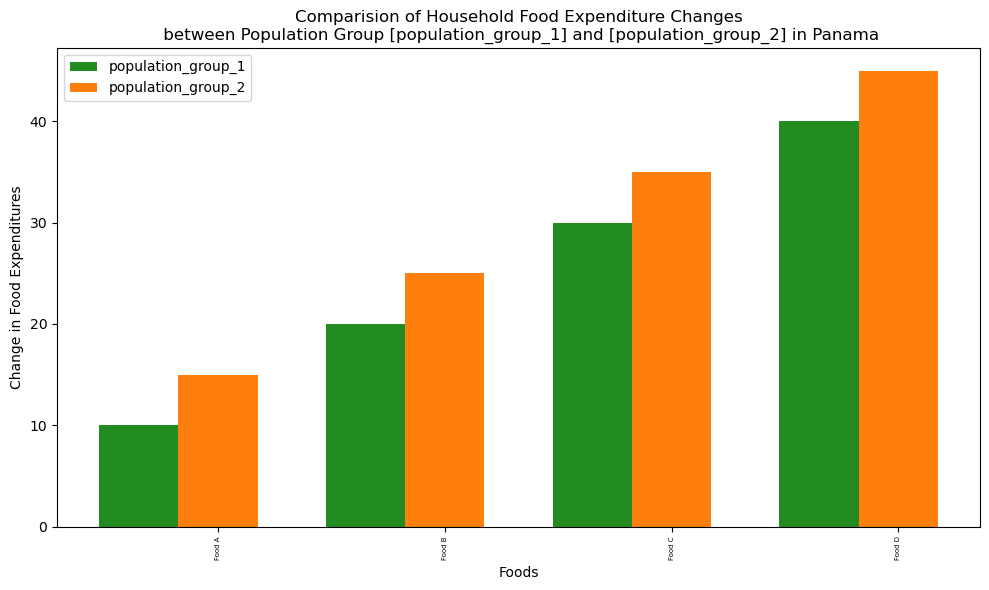

ok

----------------------------------------------------------------------
Ran 2 tests in 0.233s

OK


In [7]:
class TestPlotTwoGammaTable(unittest.TestCase):
    def test_plot_two_gamma_table(self):
        # Create a sample DataFrame similar to the expected input gamma_table
        data = {'population_group_1': [10, 20, 30, 40],
                'population_group_2': [15, 25, 35, 45]}
        gamma_table = pd.DataFrame(data, index=['Food A', 'Food B', 'Food C', 'Food D'])

        # Call the function with sample inputs
        population_groups = ['population_group_1', 'population_group_2']
        plot_two_gamma_table(gamma_table, population_groups)

        # Check if the plot is shown without any errors
        plt.close('all')  # Close all figures to avoid plot display during testing
        self.assertTrue(True)  # If no errors occurred, the test passes

# Run the tests
unittest.main(argv=[''], verbosity=2, exit=False)

<br>

<br>

<br>

<br>

<br>

<br>

<br>


# Unit Test for `comparison_table` Function

This unit test is designed to validate the functionality of the `comparison_table` function, which is responsible for generating a comparison table for actual and recommended nutrient values.

## Purpose

The purpose of this unit test is to verify that the `comparison_table` function correctly computes the difference between actual and recommended nutrient values, identifies whether each nutrient is excessive, insufficient, or within recommended range, and applies appropriate styling to the resulting DataFrame.

## Test Cases

The following test cases are included in this unit test:

1. **Test Case 1**: Ensure that the function returns a DataFrame with correct structure and content.
2. *(Additional test cases can be added as needed)*

## Pre-requisites

This unit test assumes that the `comparison_table` function is implemented and available for testing. It also assumes that the function takes two Pandas Series objects representing actual and recommended nutrient values as input.

## Execution

To run the unit test, execute the test script containing the test cases. The script will call the `comparison_table` function with sample inputs and validate the output against expected results.



## Original Code from Main Notebook (EEP153_project_4.ipynb): 

In [4]:
def comparison_table(actual_nutrients_example, recommended_nutrients_example):
    # Create a DataFrame from the two series
    df = pd.DataFrame({'Actual Nutrients': actual_nutrients_example, 'Recommended Nutrients': recommended_nutrients_example})
    
    # Add a column for the difference
    df['Difference'] = df['Actual Nutrients'] - df['Recommended Nutrients']
    
    # Add a column for marking excessive or insufficient
    status_list = []
    for diff in df['Difference']:
        if diff > 1000:
            status_list.append('Excessive')
        elif diff < -1000:
            status_list.append('Insufficient')
        elif abs(diff) <= 1000:
            status_list.append('Satisfy')
        else:
            status_list.append(None)

    df['Status'] = pd.Series(status_list, index=df.index)

    
    # Function to apply cell styling based on status
    def color_cell(val):
        if val == 'Excessive':
            return 'background-color: red'
        elif val == 'Insufficient':
            return 'background-color: skyblue'
        elif val == 'Satisfy':
            return 'background-color: lime'
    
    # Apply styling to the 'Status' column
    styled_df = df.style.applymap(color_cell, subset=['Status'])

    return styled_df

## Unit Test: 

/tmp/ipykernel_208/1005346110.py:33: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(color_cell, subset=['Status'])
.

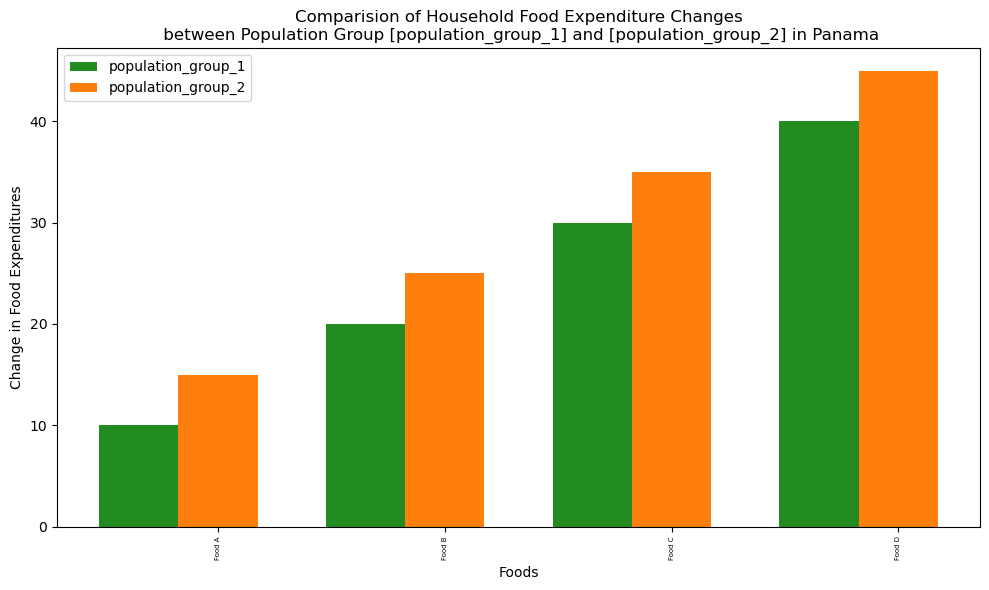

.
----------------------------------------------------------------------
Ran 2 tests in 0.224s

OK


In [10]:
class TestComparisonTable(unittest.TestCase):
    def test_comparison_table(self):
        # Sample actual nutrients data
        actual_nutrients_example = pd.Series({'Nutrient1': 1500, 'Nutrient2': 2500, 'Nutrient3': 800})

        # Sample recommended nutrients data
        recommended_nutrients_example = pd.Series({'Nutrient1': 1000, 'Nutrient2': 2000, 'Nutrient3': 900})

        # Call the function with sample inputs
        result = comparison_table(actual_nutrients_example, recommended_nutrients_example)

        # Check if the result is a DataFrame
        self.assertIsInstance(result, pd.io.formats.style.Styler)

        # Additional assertions can be added to check specific properties or behavior of the result

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

<br>

<br>

<br>

<br>

<br>

<br>

<br>


# Unit Test Introduction: `comparison_table` Function

## Overview

This unit test is designed to assess the functionality and correctness of the `comparison_table` function. The function is responsible for generating a comparison table that analyzes the disparity between actual and recommended nutrient values.

## Objective

The primary objective of this unit test is to ensure that the `comparison_table` function behaves as expected under various scenarios. Specifically, it should accurately compute the differences between actual and recommended nutrient values, categorize each nutrient as excessive, insufficient, or within the recommended range, and apply appropriate styling to the resulting table.

## Test Cases

The unit test comprises the following test cases:

1. **Basic Functionality**: Verify that the function produces the expected comparison table structure and content.
2. **Boundary Testing**: Assess the behavior of the function when provided with extreme values or edge cases.
3. **Styling Validation**: Validate that the function correctly applies styling to the comparison table based on nutrient status.

## Prerequisites

Before executing the unit test, ensure that the `comparison_table` function is implemented and accessible for testing. Additionally, it is assumed that the function accepts two Pandas Series objects representing actual and recommended nutrient values.

## Execution

To execute the unit test, run the test script containing the defined test cases. The script will invoke the `comparison_table` function with predefined inputs and evaluate the output against expected results.



## Original Code from Main Notebook (EEP153_project_4.ipynb): 

In [11]:
def color_cell(val):
    if val == 'Excessive':
        return 'background-color: red'
    elif val == 'Insufficient':
        return 'background-color: skyblue'
    elif val == 'Satisfy':
        return 'background-color: lime'

## Unit Test: 

In [16]:
def test_color_cell_excessive():
    # Test for val='Excessive'
    expected_style = 'background-color: red'
    result = color_cell('Excessive')
    if result == expected_style:
        print("Test for 'Excessive' passed.")
    else:
        print("Test for 'Excessive' failed.")

def test_color_cell_insufficient():
    # Test for val='Insufficient'
    expected_style = 'background-color: skyblue'
    result = color_cell('Insufficient')
    if result == expected_style:
        print("Test for 'Insufficient' passed.")
    else:
        print("Test for 'Insufficient' failed.")

def test_color_cell_satisfy():
    # Test for val='Satisfy'
    expected_style = 'background-color: lime'
    result = color_cell('Satisfy')
    if result == expected_style:
        print("Test for 'Satisfy' passed.")
    else:
        print("Test for 'Satisfy' failed.")

# Run the tests
test_color_cell_excessive()
test_color_cell_insufficient()
test_color_cell_satisfy()

Test for 'Excessive' passed.
Test for 'Insufficient' passed.
Test for 'Satisfy' passed.
